In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
import scipy as sp
import pickle as pkl
import nbimporter
import power_analysis
%matplotlib inline

Importing Jupyter notebook from power_analysis.ipynb


# Obtaining performance results from STREAM and SHA benchmarking application on ODROIDxu3 
Trying to see if there is any relationship between running a mix of little and big cores compared to only running big cores or only running small cores

## Loading stream performance results from little, big and mixed core runs

In [2]:
file_path = '/Users/yzamora/power/STREAM_little.results'
df = pd.read_csv(file_path, sep='\s+')
df = power_analysis.create_col(df)
print(df.head())


file_2 = '/Users/yzamora/power/all.out'
df_2 = pd.read_csv(file_2, sep='\s+')
df_2 = power_analysis.create_col(df_2)
print(df_2.head())


file_path_big = '/Users/yzamora/power/STREAM_big.results'
df_3 = pd.read_csv(file_path_big, sep='\s+')
df_3 = power_analysis.create_col(df_3)
print(df.head())


  cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0  0x01   400000  0.813437  1.567205  963.322830         NaN        NaN   
1  0x01   600000  0.813564  1.563017  960.598518         NaN        NaN   
2  0x01   700000  0.813284  1.560912  959.635117         NaN        NaN   
3  0x01   800000  0.813087  1.561105  959.986377         NaN        NaN   
4  0x01  1000000  0.813391  1.561579  959.919007         NaN        NaN   

   big_cores  lil_cores  total_cores  core-0  core-1  core-2  core-3  core-4  \
0          0          1            1       0       0       0       0       0   
1          0          1            1       0       0       0       0       0   
2          0          1            1       0       0       0       0       0   
3          0          1            1       0       0       0       0       0   
4          0          1            1       0       0       0       0       0   

   core-5  core-6  core-7  
0       0       0       1  
1       0   

### Cleaning up data 

In [3]:
#df = df.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY','big_cores','lil_cores','total_cores'])
df = df.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])
df_2 = df_2.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])
df_3 = df_3.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])

In [4]:
#print(df.head())
#print(df_2.head())
#print(df_3.head())

## Mixed vs little vs big

In [22]:
def plot_3(df_1,label1, df_2, label2, df_3, label3, application_name):
    df = df_1
    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.scatter(x=(df['Rate']),y=(df['Power']),label=label1)
    #ax=fig.add_subplot(212)
    ax.scatter(x=(df_2['Rate']),y=(df_2['Power']),label=label2)
    ax.scatter(x=(df_3['Rate']),y=(df_3['Power']),label=label3)

    
    plt.title(application_name + " Results")
    plt.legend(loc='best');
    ax.set_xlabel('Rate')
    ax.set_ylabel('Power (Watts)')
    plt.figure(figsize=(20,20))
    plt.show()
    
def plot_1(df_1,df_label,application_name):
    df = df_1
    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.scatter(x=(df['Rate']),y=(df['Power']),label=df_label)
    
    plt.title(application_name + " Results")
    plt.legend(loc='best');
    ax.set_xlabel('Rate')
    ax.set_ylabel('Power (Watts)')
    plt.figure(figsize=(20,20))
    plt.show()

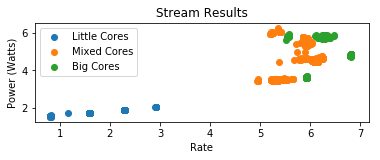

<Figure size 1440x1440 with 0 Axes>

      freq      Rate     Power      Energy  big_cores  lil_cores  total_cores  \
0   400000  0.813437  1.567205  963.322830          0          1            1   
1   600000  0.813564  1.563017  960.598518          0          1            1   
2   700000  0.813284  1.560912  959.635117          0          1            1   
3   800000  0.813087  1.561105  959.986377          0          1            1   
4  1000000  0.813391  1.561579  959.919007          0          1            1   

   core-0  core-1  core-2  core-3  core-4  core-5  core-6  core-7  
0       0       0       0       0       0       0       0       1  
1       0       0       0       0       0       0       0       1  
2       0       0       0       0       0       0       0       1  
3       0       0       0       0       0       0       0       1  
4       0       0       0       0       0       0       0       1  


In [21]:
plot_3(df,"Little Cores", df_2, "Mixed Cores", df_3, "Big Cores", "Stream")
#print(df)
print(df.head())

In [7]:
def threed_graph(df):
    #colors=['blue', 'c', 'y', 'm', 'r']
    core_rate = df['Rate'].values
    core_power = df['Power'].values
    #print (df['big_cores'])
    core_big = df['big_cores'].values
    core_lil = df['lil_cores'].values
    core_all = df['total_cores'].values

    ax = plt.subplot(111,projection='3d')
    ax.plot(core_rate, core_lil, core_power,'.',c = "blue", label ='Little Cores')
    ax.plot(core_rate, core_all, core_power,'o',c = "green", label ='All Cores')
    ax.plot(core_rate, core_big, core_power,'p',c= "red", label ='Big Cores')

    #ax.legend()
    #plt.legend(loc='upper center', numpoints=1, ncol=3, fontsize=10, bbox_to_anchor=(0, 0))
    plt.legend(loc=2)
    ax.set_zlabel('Power')
    ax.set_ylabel("Number of Cores")
    ax.set_xlabel("Rate")
    #ax = fig.gca(projection='3d')

    plt.title('Mixed Cores = Rate vs Power')


## Importing only little + only big cores + mixed data

In [8]:
file_path = '/Users/yzamora/power/little_big.out'

df_lb = pd.read_csv(file_path, sep='\s+')
df_lb = power_analysis.create_col(df_lb)
df_lb = df_lb.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])


Plottingr rate VS number of cores VS Power

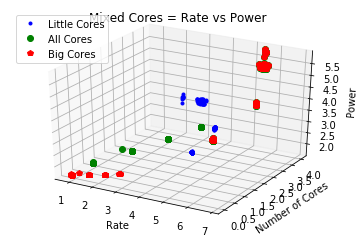

In [9]:
threed_graph(df_lb)

# Importing SHA Results

In [10]:
file_path = '/Users/yzamora/power/SHA_mixed.results'
file_path_2 = '/Users/yzamora/power/SHA.results'
file_path_3 = '/Users/yzamora/power/SHA_big.results'


sha = pd.read_csv(file_path, sep='\s+')
sha = power_analysis.create_col(sha)

sha_2 = pd.read_csv(file_path_2, sep='\s+')
sha_2 = power_analysis.create_col(sha_2)

sha_3 = pd.read_csv(file_path_3, sep='\s+')
sha_3 = power_analysis.create_col(sha_3)
#print(sha.head())
#print(sha_2)

In [11]:
sha = sha.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])
sha_2 = sha_2.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])
sha_3 = sha_3.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY'])

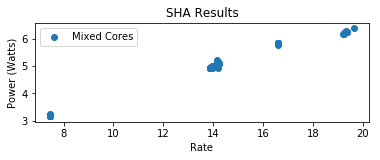

<Figure size 1440x1440 with 0 Axes>

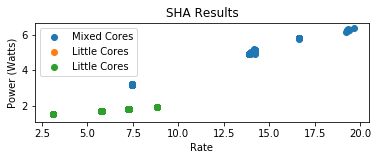

<Figure size 1440x1440 with 0 Axes>

In [12]:
plot_1(sha,"Mixed Cores","SHA")
plot_3(sha,"Mixed Cores",sha_2, "Little Cores", sha_2, "Little Cores", "SHA")

In [13]:
def plot_3(data_1, label1, data_2, label2, data_3, label3, application_name):
    fig=plt.figure()
    ax=fig.add_subplot(211)
    ax.scatter(data_1,data_3,label=label1)
    #ax=fig.add_subplot(212)
    ax.scatter(data_2,data_3,label=label2)
    
    plt.title(application_name + " Results")
    plt.legend(loc='best');
    ax.set_xlabel('Rate')
    ax.set_ylabel('Power (Watts)')
    plt.figure(figsize=(20,20))
    plt.show()

In [14]:
def bar_graph(df,title):
    fig=plt.figure()
    ax=fig.add_subplot(211)
    data = ("0_core" ,"2_cores", "3_cores", "4_cores", "5_cores", "6_cores", "7_cores","1_cores")
    data_x = ["core-0","core-1","core-2","core-3","core-4","core-5","core-5","core-6","core-7"]
    data_y = []
    y_pos = np.arange(len(data_x))
    for x in data_x:
        data_y.append( df[x].sum() )

    plt.bar(y_pos, data_y, align='center', alpha=0.5)
    plt.xticks(y_pos, data_x)
    ax.set_xlabel("Core Location", fontsize=16)
    ax.set_ylabel("Number", fontsize=16)
    plt.title(title)
    plt.show()



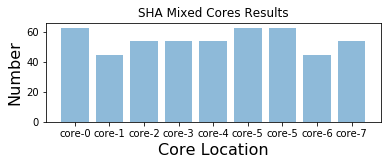

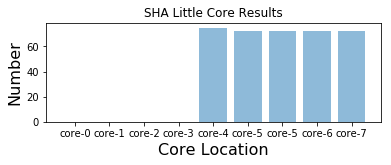

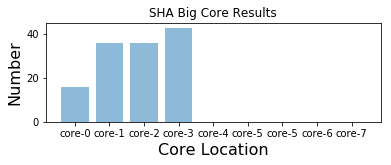

In [15]:

bar_graph(sha,"SHA Mixed Cores Results")
bar_graph(sha_2, "SHA Little Core Results")
bar_graph(sha_3, "SHA Big Core Results")



## Power vs Rate Corresponding to Core Usage

In [16]:
def rate_power_core(df,core_location, detail):
    #print(df_3) # little cores
    fig=plt.figure()
    ax=fig.add_subplot(111)

    colors = ("red", "green", "blue", "black","magenta", "yellow", "cyan", "brown")
    area = np.pi*3

    xlabel = 'Power'
    ylabel = 'Rate' #'Energy' # 'Rate' # 'freq'

    dfg = df.groupby(core_location)
    X_max = 0; Y_max = 0
    for name,group in dfg:
        X = group[ xlabel ].tolist()
        Y = group[ ylabel ].tolist()
        X_max = max ( max(X), X_max)
        Y_max = max ( max(Y), Y_max)
    ii=0
    for name,group in dfg:
        X = group[ xlabel ].tolist()
        Y = group[ ylabel ].tolist()
        X = [float(i)/X_max for i in X]
        Y = [float(i)/Y_max for i in Y]

        plt.scatter(X[:], Y[:], s=area, c=colors[ii], alpha=0.5, label=str(name)+'-cores' )
        ii+=1

    ax.set_xlabel( xlabel, fontsize=16)
    ax.set_ylabel( ylabel, fontsize=16)
    plt.title(xlabel+" vs "+ylabel + " - " + detail)
    plt.legend(loc='best')
    plt.show()


## Analysis of SHA and STREAM results - Power vs Rate

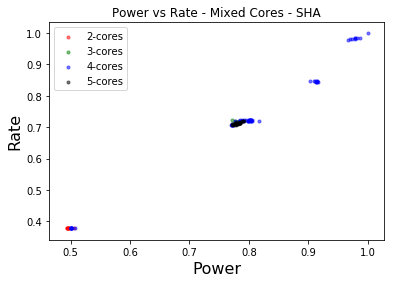

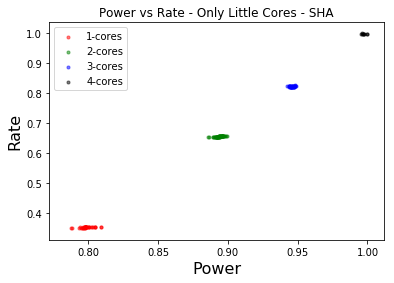

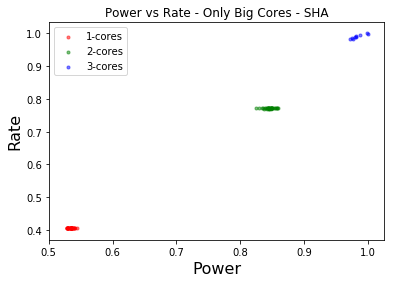

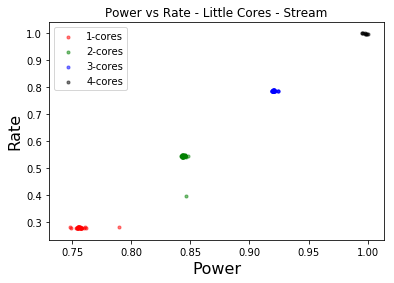

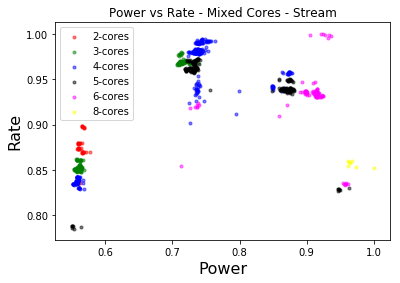

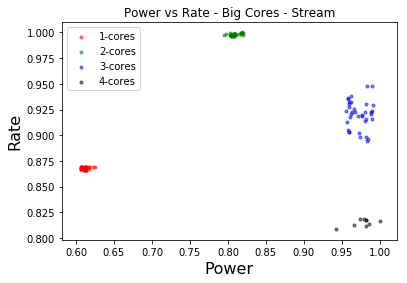

In [17]:
rate_power_core(sha, "total_cores", "Mixed Cores - SHA")
rate_power_core(sha_2, "lil_cores","Only Little Cores - SHA")
rate_power_core(sha_3, "big_cores","Only Big Cores - SHA")

rate_power_core(df, "lil_cores",  "Little Cores - Stream")
rate_power_core(df_2, "total_cores", "Mixed Cores - Stream")
rate_power_core(df_3,"big_cores", "Big Cores - Stream")

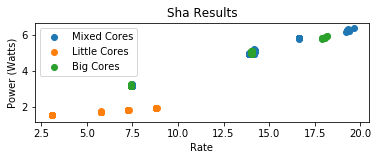

<Figure size 1440x1440 with 0 Axes>

In [23]:
plot_3(sha,"Mixed Cores", sha_2, "Little Cores", sha_3, "Big Cores", "Sha")
